## About This Project :
In this project, we aim to analyze Zomato restaurant data to identify key factors
that contribute to the success of restaurants, as measured by their ratings. By
exploring various features such as location, cuisine, pricing, and service
offerings, we aim to provide insights that can help restaurant owners and
Zomato users make informed decisions.

## Importing libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


## Load Dataset

In [2]:
df= pd.read_csv('Indian-Resturants.csv')

In [3]:
df

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211939,3202251,Kali Mirch Cafe And Restaurant,['Casual Dining'],https://www.zomato.com/vadodara/kali-mirch-caf...,"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,32,Fatehgunj,22.336931,73.192356,...,2,Rs.,"['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...",4.1,Very Good,243,40,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1
211941,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171164,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211942,3201138,Subway,['Quick Bites'],https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,...,2,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,0.0,1,-1


## Data Overview


In [4]:
# To check the rows and columns avialable in the dataset
df.shape

(211944, 26)

In [5]:
# columns name so that we can choose which is important for the analysis purpose in the data set
df.columns

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')

In [6]:
# Check data information so that it can be useful for the understanding the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [7]:
# Check Discription of the dataset as to look the stats on the columns

df.describe(include='all')

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
count,2.119440e+05,211944,211944,211944,211810,211944,211944.000000,211944,211944.000000,211944.000000,...,211944.000000,211944,211944,211944.000000,211944,211944.000000,211944.000000,211896.0,211944.000000,211944.0
unique,NaN,41100,27,55568,50657,99,NaN,3731,NaN,NaN,...,NaN,1,31455,NaN,39,NaN,NaN,NaN,NaN,NaN
top,NaN,Domino's Pizza,['Quick Bites'],https://www.zomato.com/chennai/3bs-buddies-bar...,"Laxman Jhula, Tapovan, Rishikesh",Chennai,NaN,Civil Lines,NaN,NaN,...,NaN,Rs.,"['Dinner', 'Takeaway Available', 'Lunch', 'Cas...",NaN,Very Good,NaN,NaN,NaN,NaN,NaN
freq,NaN,3108,64390,169,299,11630,NaN,3660,NaN,NaN,...,NaN,211944,3352,NaN,65451,NaN,NaN,NaN,NaN,NaN
mean,1.349411e+07,NaN,NaN,NaN,NaN,NaN,4746.785434,NaN,21.499758,77.615276,...,1.882535,NaN,NaN,3.395937,NaN,378.001864,256.971224,0.0,-0.255907,-1.0
std,7.883722e+06,NaN,NaN,NaN,NaN,NaN,5568.766386,NaN,22.781331,7.500104,...,0.892989,NaN,NaN,1.283642,NaN,925.333370,867.668940,0.0,0.964172,0.0
min,5.000000e+01,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.000000,0.000000,...,1.000000,NaN,NaN,0.000000,NaN,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,3.301027e+06,NaN,NaN,NaN,NaN,NaN,11.000000,NaN,15.496071,74.877961,...,1.000000,NaN,NaN,3.300000,NaN,16.000000,3.000000,0.0,-1.000000,-1.0
50%,1.869573e+07,NaN,NaN,NaN,NaN,NaN,34.000000,NaN,22.514494,77.425971,...,2.000000,NaN,NaN,3.800000,NaN,100.000000,18.000000,0.0,-1.000000,-1.0
75%,1.881297e+07,NaN,NaN,NaN,NaN,NaN,11306.000000,NaN,26.841667,80.219323,...,2.000000,NaN,NaN,4.100000,NaN,362.000000,128.000000,0.0,1.000000,-1.0


## Data Cleaning

In [8]:
# To check the null values available in the dataset of the column

df.isnull().sum()

res_id                       0
name                         0
establishment                0
url                          0
address                    134
city                         0
city_id                      0
locality                     0
latitude                     0
longitude                    0
zipcode                 163187
country_id                   0
locality_verbose             0
cuisines                  1391
timings                   3874
average_cost_for_two         0
price_range                  0
currency                     0
highlights                   0
aggregate_rating             0
rating_text                  0
votes                        0
photo_count                  0
opentable_support           48
delivery                     0
takeaway                     0
dtype: int64

In [9]:
# Total null values in the dataset

df.isnull().sum().sum()

168634

In [10]:
#Let's check for the duplicate values in the dataset

df.duplicated().sum()

151527

In [11]:
# Drop the duplicate values from the dataset

df.drop_duplicates(inplace=True)

In [12]:
df.shape

(60417, 26)

In [13]:
df.duplicated().sum() # now we can see that there is no duplicate values in the dataset


0

In [14]:
# now check for the null values in the dataset
df.isnull().sum()

res_id                      0
name                        0
establishment               0
url                         0
address                    18
city                        0
city_id                     0
locality                    0
latitude                    0
longitude                   0
zipcode                 47869
country_id                  0
locality_verbose            0
cuisines                  470
timings                  1070
average_cost_for_two        0
price_range                 0
currency                    0
highlights                  0
aggregate_rating            0
rating_text                 0
votes                       0
photo_count                 0
opentable_support          19
delivery                    0
takeaway                    0
dtype: int64

In [15]:
# Removing all null values from the each column having null values
df.address =df.address.fillna("Unkonow")
df.zipcode=df.zipcode.fillna("Unknown")
df.cuisines= df.cuisines.fillna("Unknown")
df.timings=df.timings.fillna("Unknown")
df.timings=df.timings.fillna("Unknown")
df.opentable_support=df.opentable_support.fillna('0.0')

In [16]:
# Now check for the null values present as there is no any null values present right noe in the dataset

df.isnull().sum()

res_id                  0
name                    0
establishment           0
url                     0
address                 0
city                    0
city_id                 0
locality                0
latitude                0
longitude               0
zipcode                 0
country_id              0
locality_verbose        0
cuisines                0
timings                 0
average_cost_for_two    0
price_range             0
currency                0
highlights              0
aggregate_rating        0
rating_text             0
votes                   0
photo_count             0
opentable_support       0
delivery                0
takeaway                0
dtype: int64

<Axes: >

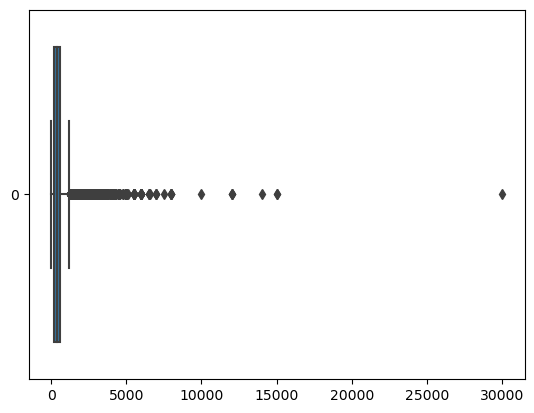

In [17]:
# Checking for the outlier in the average_cost_for_two
sns.boxplot(df.average_cost_for_two, orient='h')

In [18]:
# Renaming column name

df.rename(columns={'average_cost_for_two':'Twoplatecost','aggregate_rating':'rating'},inplace=True)

In [19]:
df.columns

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'Twoplatecost',
       'price_range', 'currency', 'highlights', 'rating', 'rating_text',
       'votes', 'photo_count', 'opentable_support', 'delivery', 'takeaway'],
      dtype='object')

In [20]:
# now removing the outlier with it's mean average price of the 2platecost.
df.rename(columns={'2platecost':'Twoplatecost'},inplace=True)

In [21]:
#checking for the average price of Twoplatecost

df.Twoplatecost.mean()

538.3045169405962

In [22]:
Q1,Q3=df.Twoplatecost.quantile([.25,.75])

In [23]:
Q1,Q3

(200.0, 600.0)

In [24]:
IQR=Q3-Q1

In [25]:
IQR

400.0

In [26]:
UL=Q3+1.5*(IQR)
LL=Q1-1.5*(IQR)
UL,LL

(1200.0, -400.0)

In [27]:
df.Twoplatecost=np.where(df.Twoplatecost>UL,UL,df.Twoplatecost)

<Axes: >

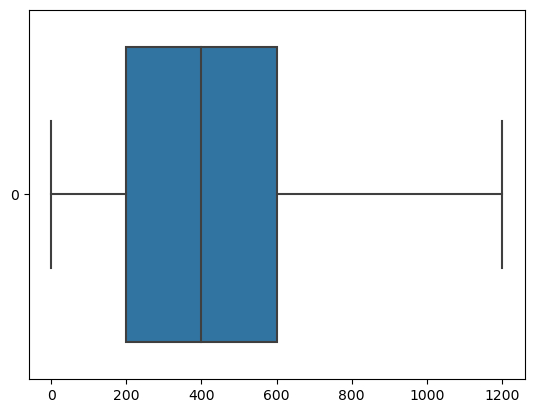

In [28]:
sns.boxplot(df.Twoplatecost,orient='h')

<Axes: >

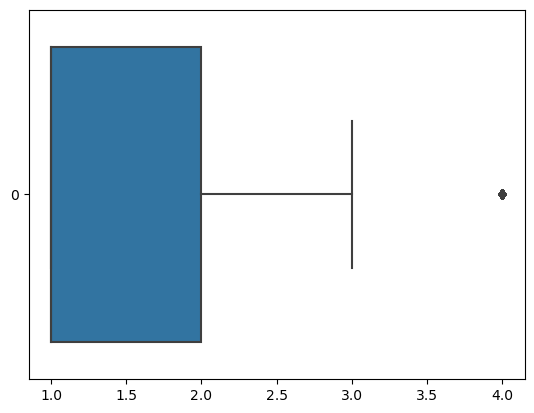

In [29]:
# Now checking the outlier for the price_range

sns.boxplot(df.price_range,orient='h')

- As we can see that the price range of the dataset is not much affected by the outlier so we left it as usual.



In [30]:
# Filter the establishment coulumn for proper string format

df['establishment']= df['establishment'].str.replace('[','')
df['establishment']= df['establishment'].str.replace(']','')
df['establishment']= df['establishment'].str.replace("'",'')

In [31]:
df.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,Quick Bites,https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,Quick Bites,https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,Quick Bites,https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,Quick Bites,https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,Casual Dining,https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [32]:
# Renaming the name of the restaurent which are less than 100
other_name = df.name.value_counts(ascending=False)
other_name

Domino's Pizza                                       406
Cafe Coffee Day                                      323
KFC                                                  261
Subway                                               211
Keventers                                            208
                                                    ... 
Jai Bhole ki Vaishnav Bhojnalaya                       1
Shri Hari Snacks                                       1
Greeno Restaurant                                      1
The Dark Mustache ( Kathi Roll Barbeque Chicken )      1
Geeta lodge                                            1
Name: name, Length: 41100, dtype: int64

In [33]:
other_name_less_than100= other_name[other_name<100]
other_name_less_than100

The Chocolate Room                                   87
The Belgian Waffle Co.                               81
Frozen Bottle                                        76
Lassi Shop                                           74
Giani's                                              73
                                                     ..
Jai Bhole ki Vaishnav Bhojnalaya                      1
Shri Hari Snacks                                      1
Greeno Restaurant                                     1
The Dark Mustache ( Kathi Roll Barbeque Chicken )     1
Geeta lodge                                           1
Name: name, Length: 41088, dtype: int64

In [34]:
def names_column(values):
    if values in other_name_less_than100:
        return 'others'
    else:
        return values
df['name']=df['name'].apply(names_column)
df['name'].value_counts()

others             58022
Domino's Pizza       406
Cafe Coffee Day      323
KFC                  261
Subway               211
Keventers            208
Baskin Robbins       207
McDonald's           155
Pizza Hut            150
Burger King          144
Barbeque Nation      120
Monginis             108
ibaco                102
Name: name, dtype: int64

In [35]:
# change the city name to other_city having number of restuarents less than 1000

other_city= df.city.value_counts(ascending=False)
other_city

Chennai          2612
Mumbai           2538
Bangalore        2365
Pune             1911
New Delhi        1847
                 ... 
Udupi              61
Howrah             50
Neemrana           26
Greater Noida      22
Nayagaon           15
Name: city, Length: 99, dtype: int64

In [36]:
other_city_less_than1000= other_city[other_city<1000]
other_city_less_than1000

Ludhiana         992
Bhopal           971
Agra             892
Hyderabad        866
Kanpur           836
                ... 
Udupi             61
Howrah            50
Neemrana          26
Greater Noida     22
Nayagaon          15
Name: city, Length: 83, dtype: int64

In [37]:
def rename_city(value):
    if value in other_city_less_than1000:
        return 'other'
    else:
        return value
df['city']=df['city'].apply(rename_city)

In [38]:
df['city'].value_counts()[1:]

Chennai       2612
Mumbai        2538
Bangalore     2365
Pune          1911
New Delhi     1847
Jaipur        1456
Kolkata       1413
Ahmedabad     1329
Lucknow       1290
Goa           1169
Nagpur        1102
Indore        1093
Kochi         1027
Coimbatore    1019
Vadodara      1002
Surat         1001
Name: city, dtype: int64

## Data Visualisation

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'others'),
  Text(1, 0, "Domino's Pizza"),
  Text(2, 0, 'Pizza Hut'),
  Text(3, 0, 'Subway'),
  Text(4, 0, 'KFC'),
  Text(5, 0, 'Barbeque Nation'),
  Text(6, 0, 'Cafe Coffee Day'),
  Text(7, 0, 'Burger King'),
  Text(8, 0, "McDonald's"),
  Text(9, 0, 'Keventers'),
  Text(10, 0, 'Baskin Robbins'),
  Text(11, 0, 'Monginis'),
  Text(12, 0, 'ibaco')])

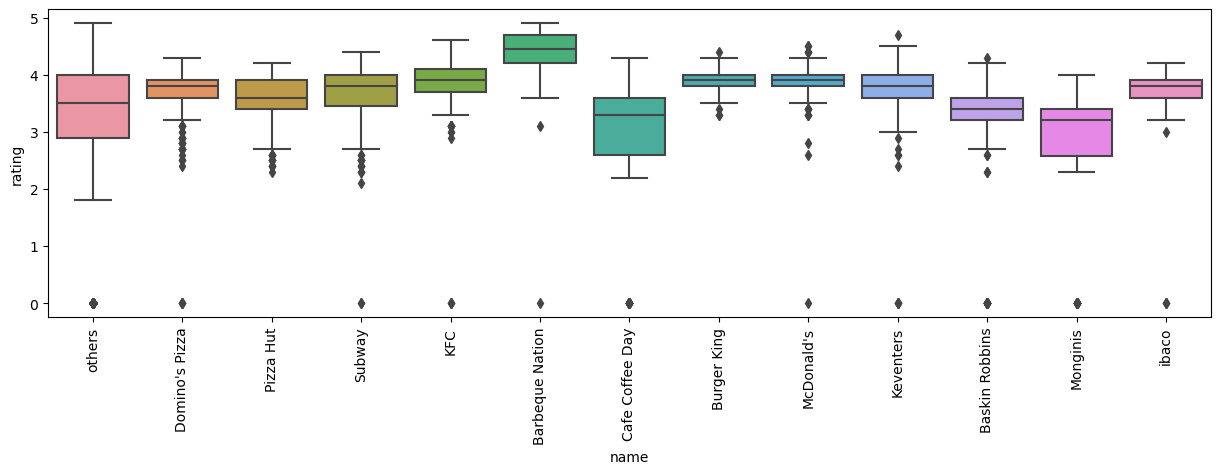

In [39]:
# Visualisation of average rating of the resturents

plt.figure(figsize=(15,4))
sns.boxplot(x='name' ,y='rating', data=df)
plt.xticks(rotation=90)

- It can seen that all restaurent rating lies between 2.5 to 4.7 hence that concludes that the all the restaurents approximately rated average.
- The Highes averages rating belongs to the Barbeque Nation.
- The lowest average rating which fallls more than 100 restaurents is Cafe Coffee Days and Monginis


<Axes: xlabel='rating', ylabel='Density'>

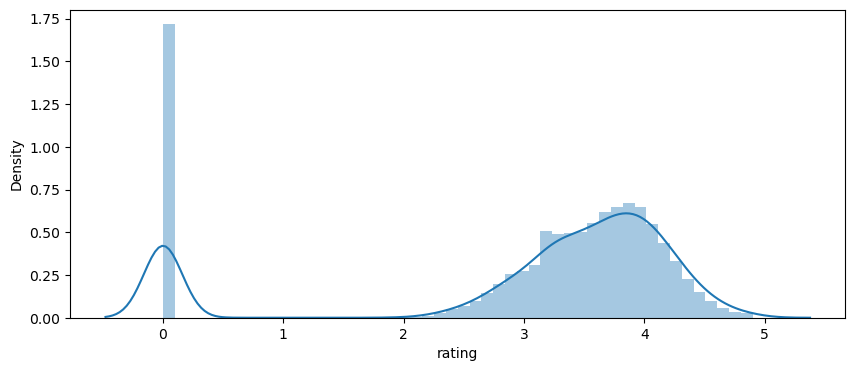

In [41]:
# Overall distribution of rating
plt.figure(figsize=(10,4))
sns.distplot(df.rating)

- The rating distribution between 2.5 to 4.7 as per this rating distribution plot.
- Mostly Restaurents are not rated


In [52]:
# Citywise mostly outlets available in the falls under zomato 

df.city.value_counts().head(10)[1:]

Chennai      2612
Mumbai       2538
Bangalore    2365
Pune         1911
New Delhi    1847
Jaipur       1456
Kolkata      1413
Ahmedabad    1329
Lucknow      1290
Name: city, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Chennai'),
  Text(1, 0, 'Mumbai'),
  Text(2, 0, 'Bangalore'),
  Text(3, 0, 'Pune'),
  Text(4, 0, 'New Delhi'),
  Text(5, 0, 'Jaipur'),
  Text(6, 0, 'Kolkata'),
  Text(7, 0, 'Ahmedabad'),
  Text(8, 0, 'Lucknow')])

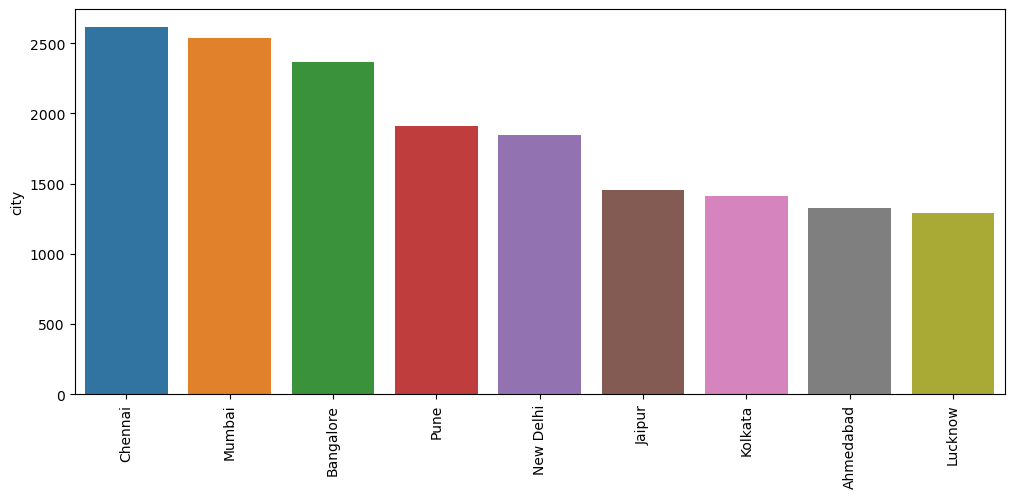

In [53]:
# Locationwise top 10 city having more number of Restuarents

plt.figure(figsize=(12,5))
ax=sns.barplot(x=df.city.value_counts().head(10)[1:].index, y=df.city.value_counts().head(10)[1:])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Chennai'),
  Text(1, 0, 'Mumbai'),
  Text(2, 0, 'Bangalore'),
  Text(3, 0, 'Pune'),
  Text(4, 0, 'New Delhi'),
  Text(5, 0, 'Jaipur'),
  Text(6, 0, 'Kolkata'),
  Text(7, 0, 'Ahmedabad'),
  Text(8, 0, 'Lucknow'),
  Text(9, 0, 'Goa'),
  Text(10, 0, 'Nagpur'),
  Text(11, 0, 'Indore'),
  Text(12, 0, 'Kochi'),
  Text(13, 0, 'Coimbatore'),
  Text(14, 0, 'Vadodara'),
  Text(15, 0, 'Surat')])

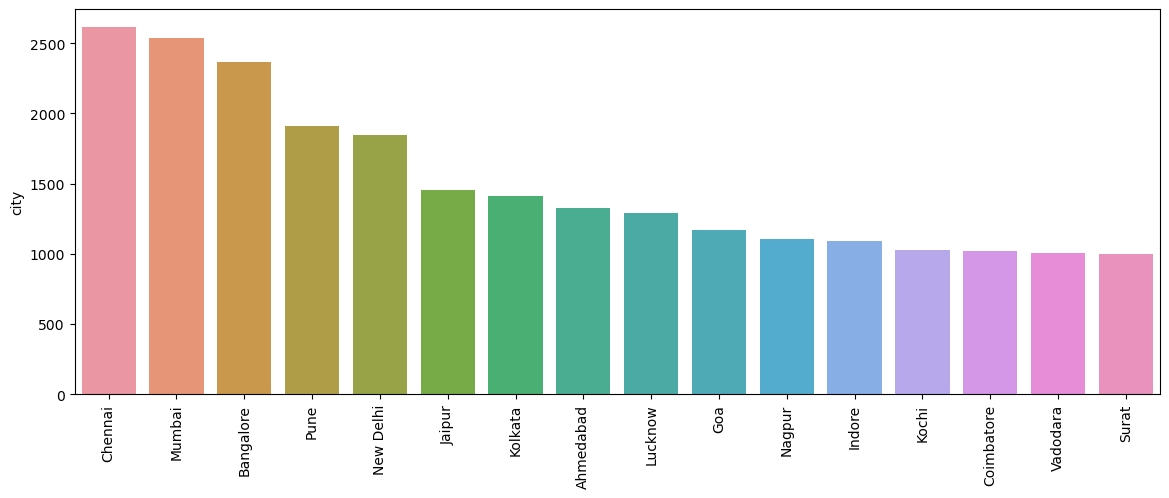

In [44]:
# Overall top city having maximum number of Restuarent 

plt.figure(figsize=(14,5))
ax=sns.barplot(x=df.city.value_counts()[1:].index, y=df.city.value_counts()[1:])
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'North Indian'),
  Text(1, 0, 'Fast Food'),
  Text(2, 0, 'North Indian, Chinese'),
  Text(3, 0, 'Bakery'),
  Text(4, 0, 'South Indian'),
  Text(5, 0, 'Street Food'),
  Text(6, 0, 'Cafe'),
  Text(7, 0, 'Mithai'),
  Text(8, 0, 'Desserts'),
  Text(9, 0, 'Bakery, Desserts')])

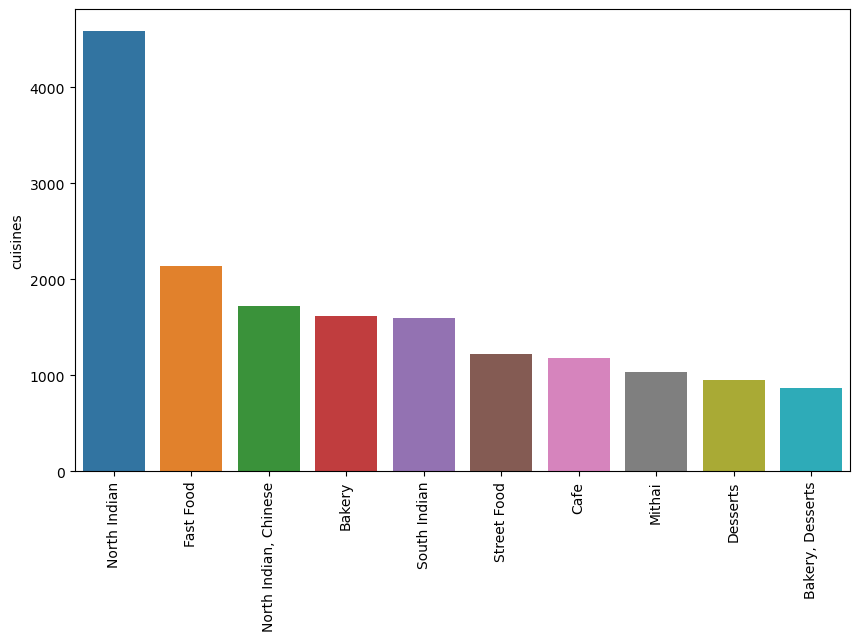

In [45]:
# Top 10 Popular cuisine among the resturents

plt.figure(figsize=(10,6))
sns.barplot(x=df.cuisines.value_counts().head(10).index, y=df.cuisines.value_counts().head(10))
plt.xticks(rotation=90)

<Axes: >

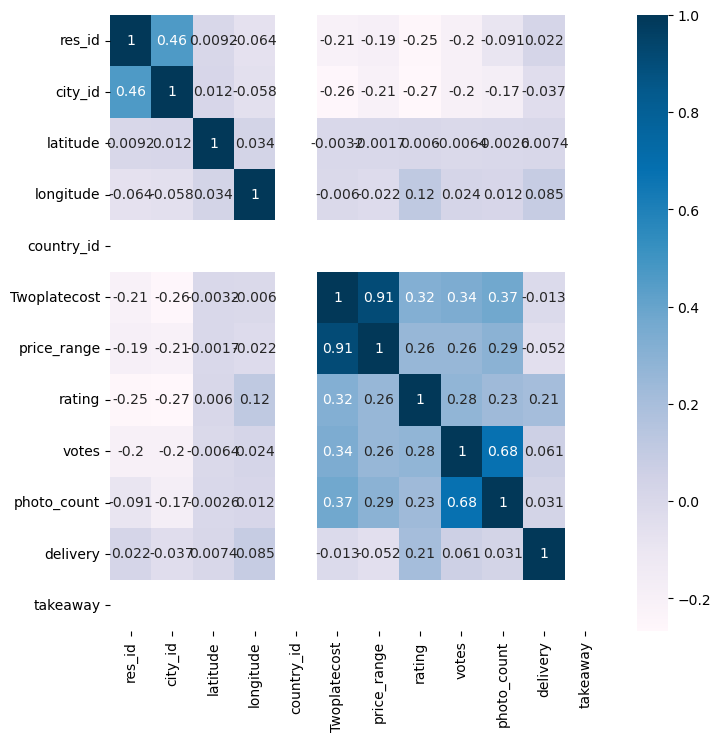

In [46]:
# Correlation of dataset 

plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, cmap='PuBu')

In [47]:
# Relationship between cuisine and rating

# First create cuisine relationship with ratings

df2= df.groupby('cuisines')['rating'].count()
df2= df2.to_frame()
df2=df2.sort_values('rating',ascending=False)
df2

,rating
cuisines,
North Indian,4587
Fast Food,2137
"North Indian, Chinese",1720
Bakery,1618
South Indian,1600
...,...
"Cafe, Desserts, Salad",1
"Italian, European, Pizza, Continental, Salad, Juices",1
"Italian, European, Pizza, Beverages",1


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'North Indian'),
  Text(1, 0, 'Fast Food'),
  Text(2, 0, 'North Indian, Chinese'),
  Text(3, 0, 'Bakery'),
  Text(4, 0, 'South Indian'),
  Text(5, 0, 'Street Food'),
  Text(6, 0, 'Cafe'),
  Text(7, 0, 'Mithai'),
  Text(8, 0, 'Desserts'),
  Text(9, 0, 'Bakery, Desserts')])

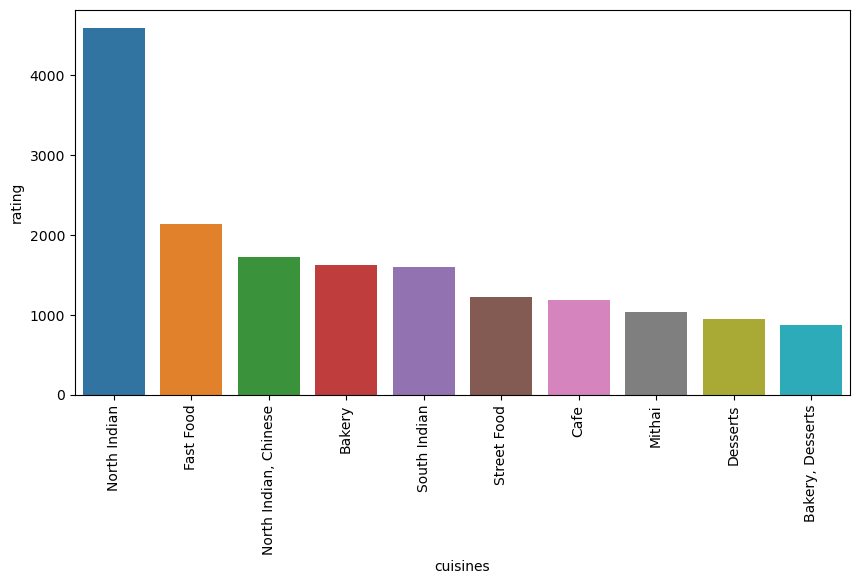

In [48]:
# Visulisation of cuisine with the rating relationship
df3=df2[:10]
plt.figure(figsize=(10,5))
sns.barplot(x=df3.index, y=df3['rating'])
plt.xticks(rotation=90)

<Axes: xlabel='price_range', ylabel='rating'>

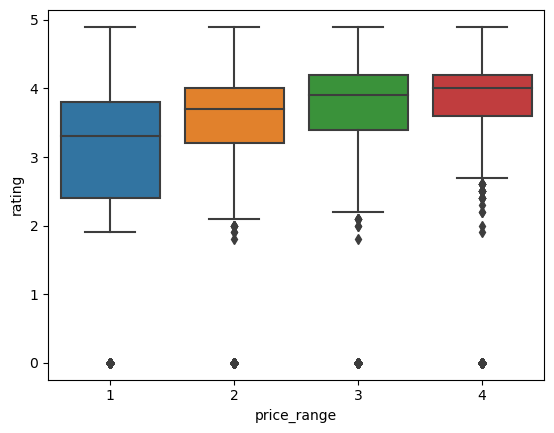

In [49]:
# Relationship between Price_range ang rating

sns.boxplot(x='price_range', y='rating', data=df)

<Axes: >

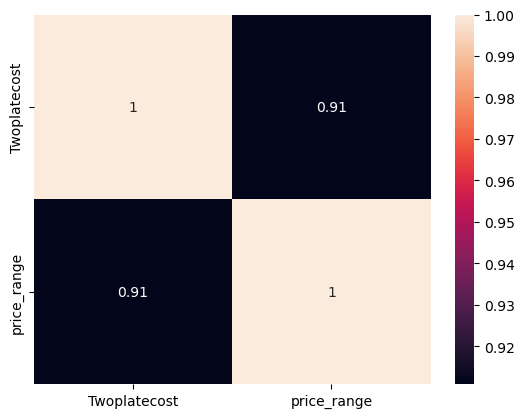

In [50]:
# 2platecost relationship with the Price_range

sns.heatmap(df[['Twoplatecost','price_range']].corr(), annot=True)

In [141]:
# Restuarent within the city by creating pivot_table

df4= df.groupby(['city','name'])['locality'].count()
df4.to_csv('city_with_name.csv')
df4=pd.read_csv('city_with_name.csv')
df4=pd.pivot_table(df4,values=None, index=['city'], columns=['name'], fill_value=0, aggfunc=np.sum)
df4

locality                                             \
name       Barbeque Nation Baskin Robbins Burger King Cafe Coffee Day   
city                                                                    
Ahmedabad                2              0           2               4   
Bangalore               12              5          11               5   
Chennai                  8              2           6               3   
Coimbatore               1              2           3              13   
Goa                      2             18           0               7   
Indore                   0              5           0               5   
Jaipur                   1             12           4               8   
Kochi                    1             14           3               6   
Kolkata                  4             10           0               0   
Lucknow                  3              7           0               7   
Mumbai                   7              0          16              13   
Nagpur                   1              3           0              11   
New Delhi                8              0          14               6   
Pune                     5              0           8               7   
Surat                    1              1           5               7   
Vadodara                 1              3           3              11   
other                   63            125          69             210   

                                                                               \
name       Domino's Pizza  KFC Keventers McDonald's Monginis Pizza Hut Subway   
city                                                                            
Ahmedabad              15    3         8         13        0         1      2   
Bangalore               8   10        30          2        0         5     10   
Chennai                12   31        14          8        0         1      9   
Coimbatore              7    6         3          4        0         4      2   
Goa                    11    4         1          2       36         2      3   
Indore                  9    2         2          7        0         4      1   
Jaipur                 10    2         4          2        0         2      5   
Kochi                   7    6         2          4        0         3      5   
Kolkata                26   16         9          0        2         2      7   
Lucknow                12    6         6          2        0         7      2   
Mumbai                  7   17        28         16        2         1     24   
Nagpur                 10    2         1          0        0         3      2   
New Delhi               4   10        10          0        0         0      2   
Pune                   13    8         8         13        1         4      3   
Surat                   9    1         4         10       17         4      3   
Vadodara               10    4         2         10        7         5      4   
other                 236  133        76         62       43       102    127   

                         
name       ibaco others  
city                     
Ahmedabad      0   1279  
Bangalore      3   2264  
Chennai       74   2444  
Coimbatore     3    971  
Goa            1   1082  
Indore         0   1058  
Jaipur         0   1406  
Kochi          1    975  
Kolkata        0   1337  
Lucknow        0   1238  
Mumbai         0   2407  
Nagpur         0   1069  
New Delhi      0   1793  
Pune           0   1841  
Surat          0    939  
Vadodara       0    942  
other         20  34977

<Axes: xlabel='city'>

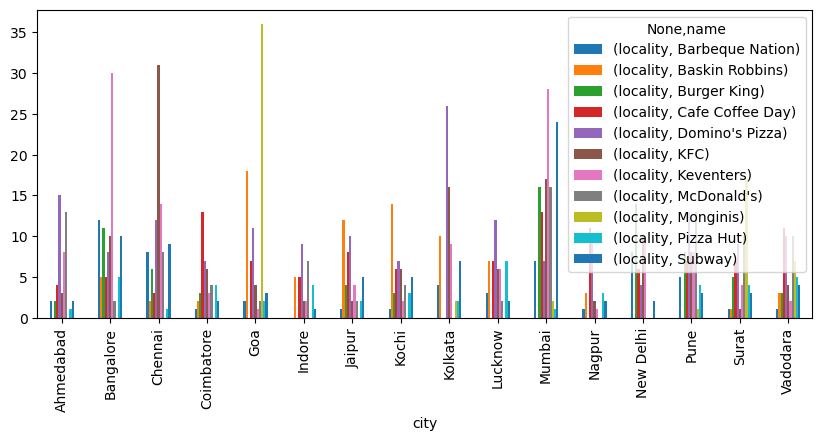

In [142]:
# Visulaisation of different resturents within the city

df4.iloc[0:16,0:11].plot(kind='bar',figsize=(10,4))


In [143]:
# Removing the square bracket from the highlights column

df['highlights']=df['highlights'].str.replace('[','')
df['highlights']=df['highlights'].str.replace(']','')

In [144]:
# Relation of Air Conditioned with rating

df['Air Conditioned']= df['highlights'].str.contains('Air Conditioned')

<Axes: xlabel='Air Conditioned', ylabel='rating'>

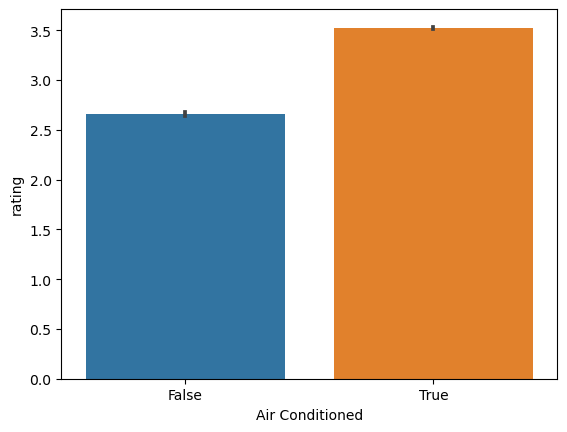

In [145]:

sns.barplot(x=df['Air Conditioned'], y=df['rating'])

<Axes: xlabel='Air Conditioned', ylabel='rating'>

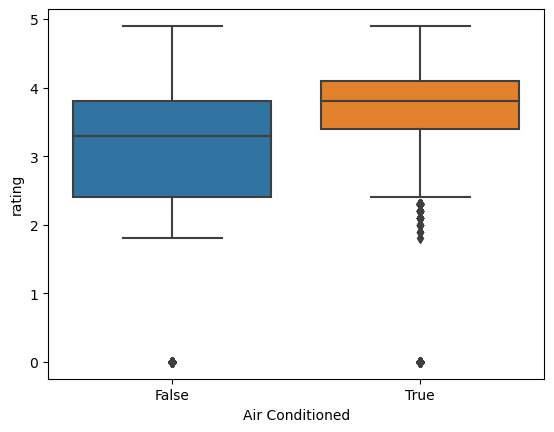

In [146]:
sns.boxplot(x=df['Air Conditioned'], y=df['rating'])

In [147]:
# Checking the contained alcohol Resturent rating by creating new column
df['contain_Alcohol']= df['highlights'].str.contains('Alcohol')

<Axes: xlabel='contain_Alcohol', ylabel='rating'>

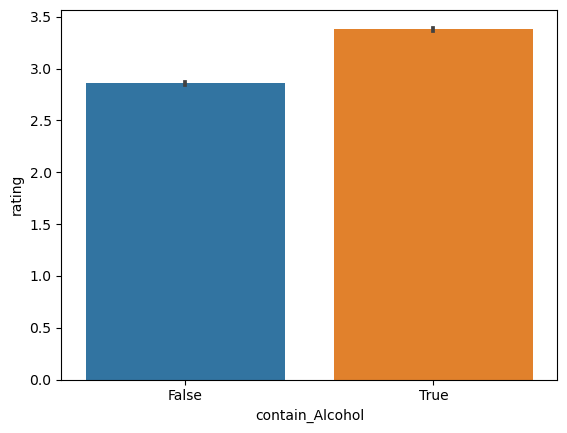

In [148]:
sns.barplot(x=df.contain_Alcohol, y=df.rating)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, 'Very Good'),
  Text(1, 0, 'Excellent'),
  Text(2, 0, 'Good'),
  Text(3, 0, 'Average'),
  Text(4, 0, 'Not rated'),
  Text(5, 0, 'Poor'),
  Text(6, 0, 'Dobré'),
  Text(7, 0, 'Baik'),
  Text(8, 0, 'Sangat Baik'),
  Text(9, 0, 'Excelente'),
  Text(10, 0, 'Bardzo dobrze'),
  Text(11, 0, 'Wybitnie'),
  Text(12, 0, 'Ottimo'),
  Text(13, 0, 'Muito Bom'),
  Text(14, 0, 'Velmi dobré'),
  Text(15, 0, 'Skvělá volba'),
  Text(16, 0, 'Muy Bueno'),
  Text(17, 0, 'Bom'),
  Text(18, 0, 'İyi'),
  Text(19, 0, 'Çok iyi'),
  Text(20, 0, 'Harika'),
  Text(21, 0, 'Terbaik'),
  Text(22, 0, 'Skvělé'),
  Text(23, 0, 'Průměr'),
  Text(24, 0, 'Ortalama'),
  Text(25, 0, 'Bueno'),
  Text(26, 0, 'Eccellente'),
  Text(27, 0, 'Muito bom'),
  Text(28, 0, 'Dobrze'),
  Text(29, 0, 'Buono'),
  Text(30, 0, 'Média'),
  Text(31, 0, 

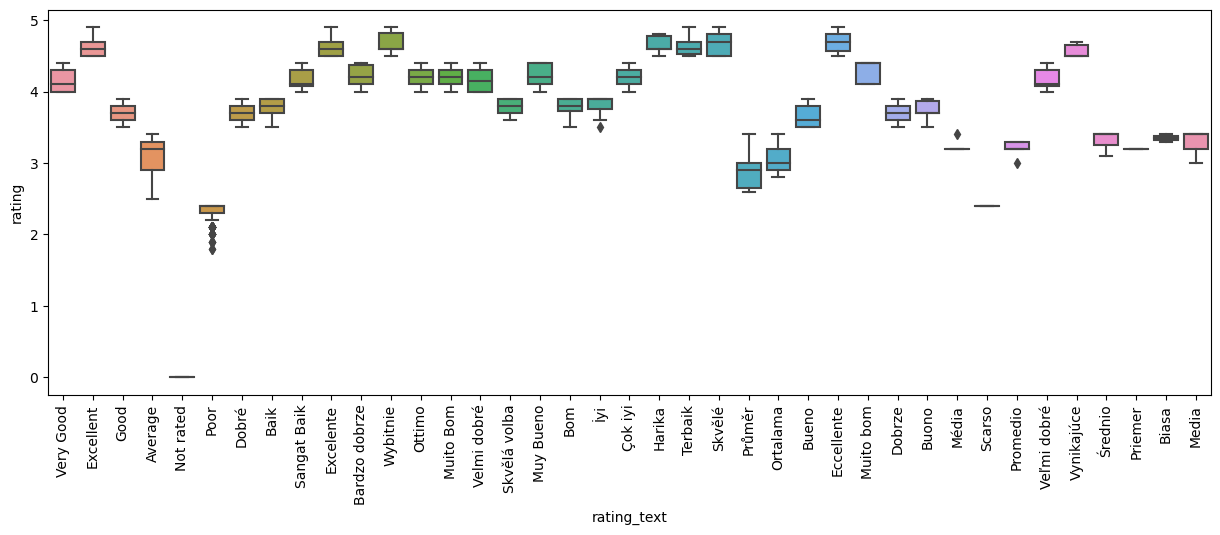

In [149]:
# Rating_Text relation with rating
plt.figure(figsize=(15,5))
sns.boxplot(x=df.rating_text, y=df.rating)
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Top 5 Rating_text')

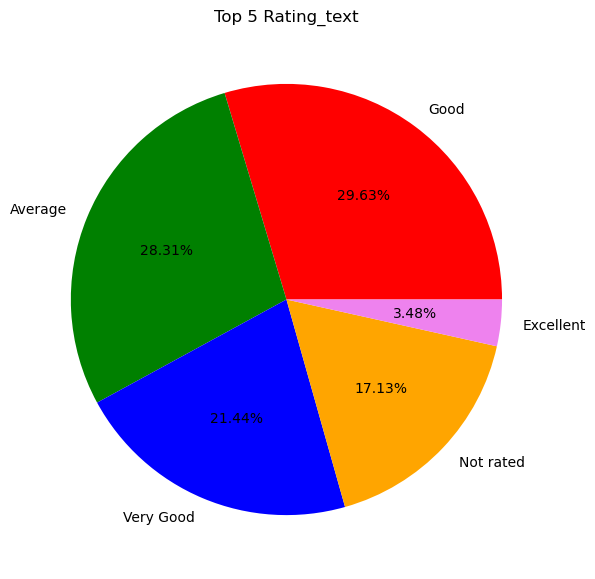

In [150]:
# Relation of rating_text 

plt.figure(figsize=(7,7))
plt.pie(df.rating_text.value_counts().head(5),labels=df.rating_text.value_counts().head(5).index, autopct='%1.2f%%', colors=['red','green','blue','orange','violet'])
plt.title('Top 5 Rating_text')

Text(0.5, 1.0, 'Top 10 Rating_text')

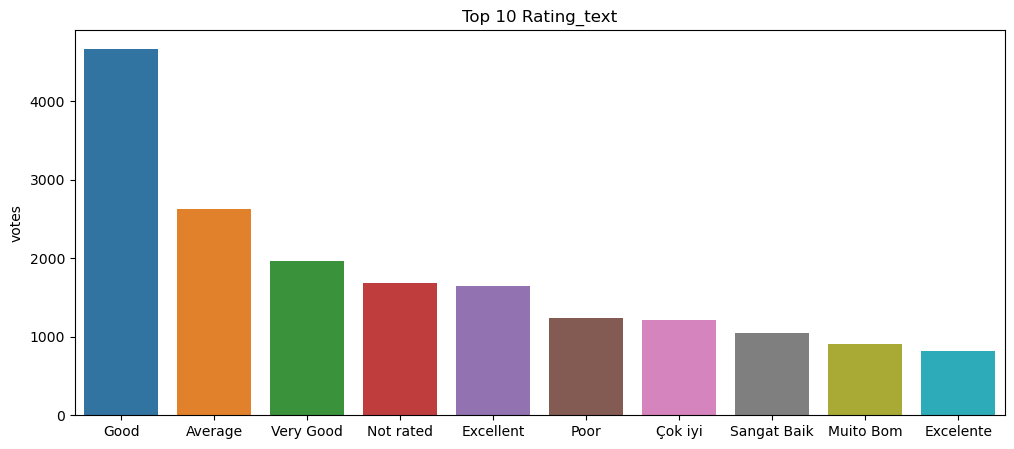

In [151]:
# Top 10 voted with rated_text
plt.figure(figsize=(12,5))
sns.barplot(x=df.rating_text.value_counts().head(10).index, y=df.votes.value_counts().head(10))
plt.title('Top 10 Rating_text')

## Investigate if there's a correlation between the variety of cuisines offered and restaurant ratings.

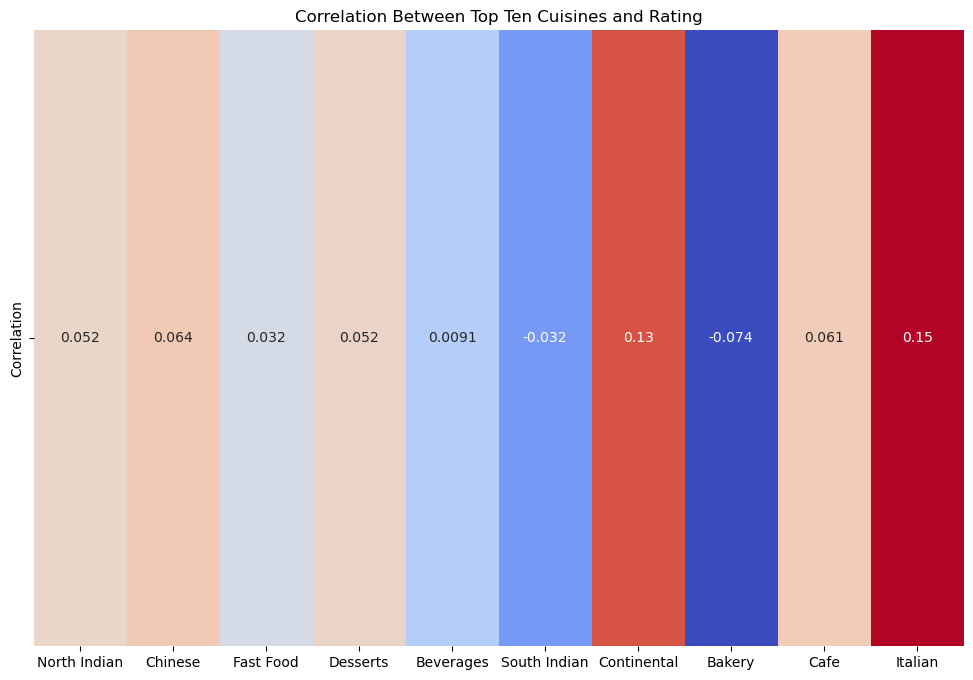

In [152]:
top_ten_cuisines = df['cuisines'].str.split(', ', expand=True).stack().value_counts().head(10).index

# Filter DataFrame for the top ten cuisines
df_top_ten_cuisines = df[df['cuisines'].str.split(', ').apply(lambda x: any(cuisine in top_ten_cuisines for cuisine in x))]

# Split cuisines and create binary columns
cuisines_df = df_top_ten_cuisines['cuisines'].str.get_dummies(', ')

# Combine binary columns with the original DataFrame
df_cuisine_corr = pd.concat([df_top_ten_cuisines['rating'], cuisines_df], axis=1)


# Calculate correlation for the top ten cuisines
top_ten_cuisine_corr = df_cuisine_corr.corr().loc[top_ten_cuisines, 'rating']
top_ten_cuisine_corr

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(top_ten_cuisine_corr.to_frame('Correlation').transpose(), annot=True, cmap='coolwarm', cbar=False)
plt.title('Correlation Between Top Ten Cuisines and Rating')
plt.show()

## Online Order and Table Booking:

- Investigate the impact of online order availability on restaurant ratings. Analyze the distribution of restaurants that offer table booking.

<Figure size 1000x600 with 0 Axes>

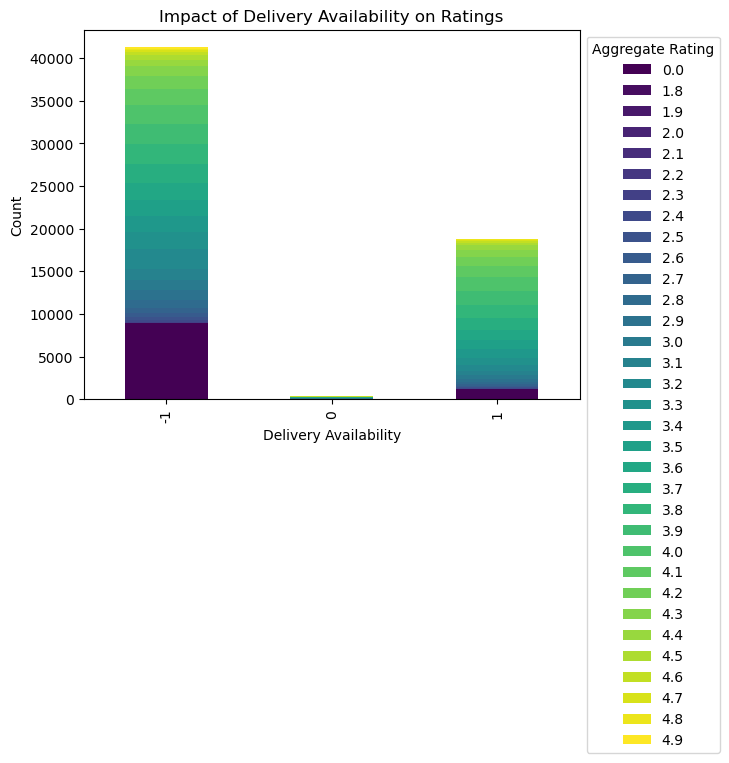

In [153]:
# Create a new DataFrame with counts
delivery_rating_counts = df.groupby(['delivery', 'rating']).size().unstack(fill_value=0)

# Plot a stacked bar chart
plt.figure(figsize=(10, 6))
delivery_rating_counts.plot(kind='bar', stacked=True, cmap='viridis')
plt.title('Impact of Delivery Availability on Ratings')
plt.xlabel('Delivery Availability')
plt.ylabel('Count')
plt.legend(title='Aggregate Rating', bbox_to_anchor=(1, 1))
plt.show()

## Top Restaurant Chains:
- Identify and visualize the top restaurant chains based on the number of outlets.

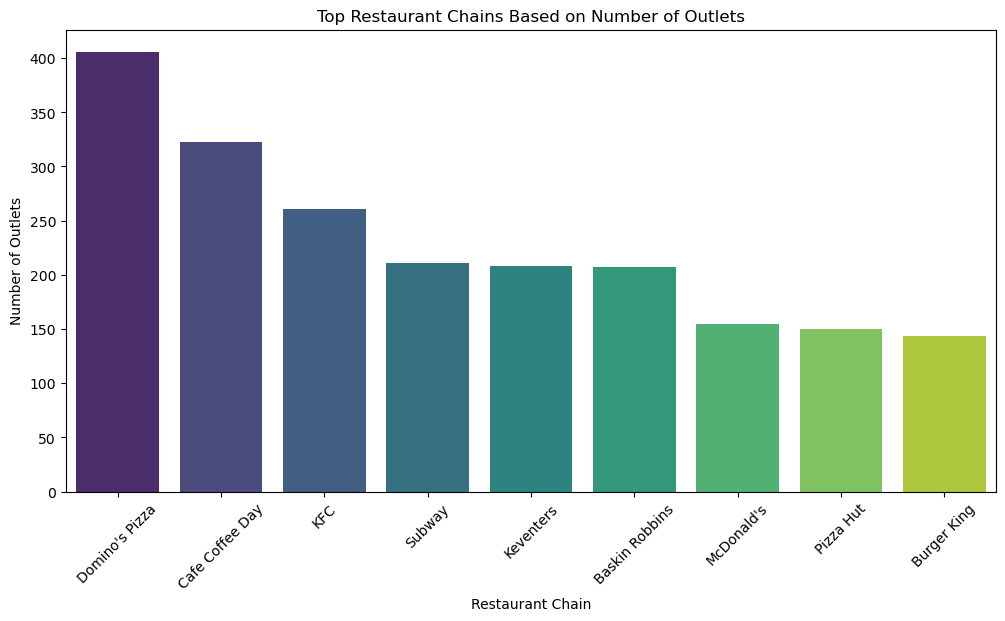

In [154]:
# Identify the top restaurant chains based on the number of outlets
top_chains = df['name'].value_counts().head(10).index

# Filter DataFrame for the top chains
df_top_chains = df[df['name'].isin(top_chains)]

# Group by chain name and count the number of outlets
chain_outlets_count = df_top_chains.groupby('name')['res_id'].count().sort_values(ascending=False)

# Plot a bar chart for the number of outlets
plt.figure(figsize=(12, 6))
sns.barplot(x=chain_outlets_count.index[1:], y=chain_outlets_count.values[1:], palette='viridis')
plt.title('Top Restaurant Chains Based on Number of Outlets')
plt.xlabel('Restaurant Chain')
plt.ylabel('Number of Outlets')
plt.xticks(rotation=45)
plt.show()

## Explore the ratings of these top chains

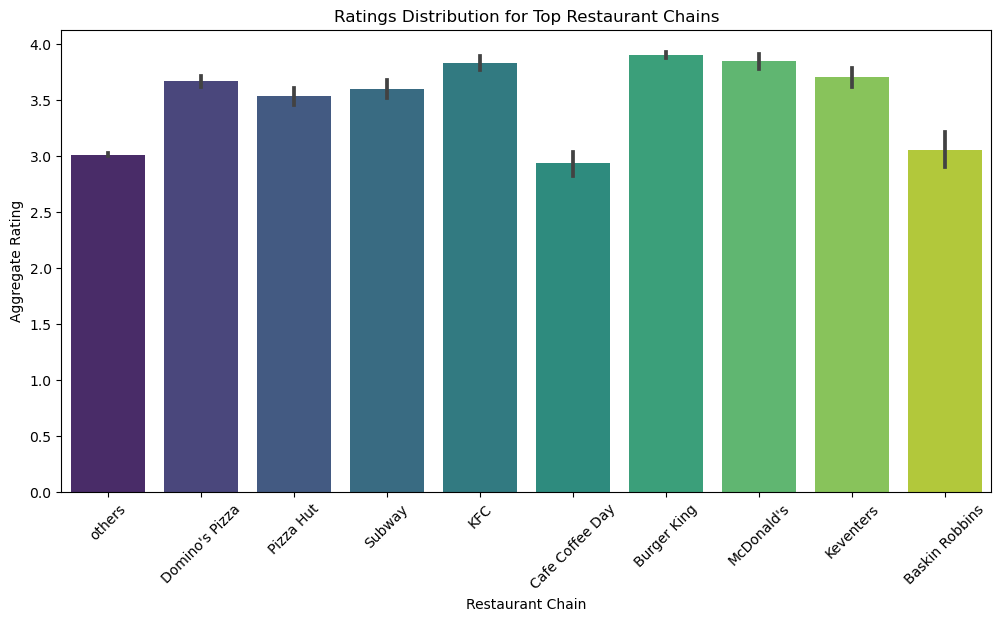

In [155]:
# Explore the ratings of the top chains
plt.figure(figsize=(12, 6))
sns.barplot(x='name', y='rating', data=df_top_chains, palette='viridis')
plt.title('Ratings Distribution for Top Restaurant Chains')
plt.xlabel('Restaurant Chain')
plt.ylabel('Aggregate Rating')
plt.xticks(rotation=45)
plt.show()

## Analyze the relationship between price range and restaurant ratings. Visualize the average cost for two people in different price categories.

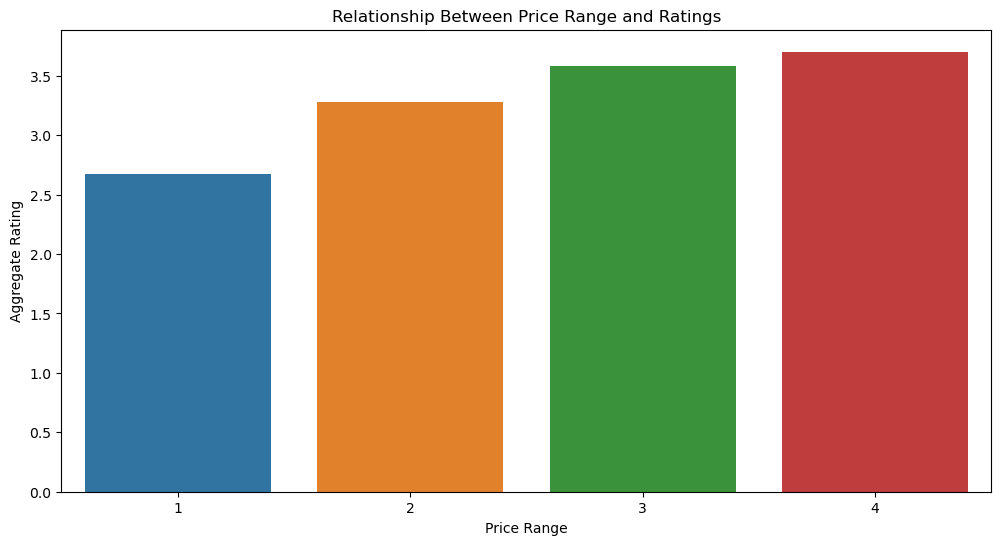

In [127]:
# Assuming df is your DataFrame
# Ensure 'price_range' is numerical for meaningful analysis
df['price_range'] = pd.to_numeric(df['price_range'], errors='coerce')

# Plotting
plt.figure(figsize=(12, 6))

# Box plot for relationship between price range and ratings
sns.barplot(x='price_range', y='rating', data=df,ci=0)
plt.title('Relationship Between Price Range and Ratings')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')
plt.show()